In [49]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest 

In [50]:
file_path=r"C:\Users\Debasish Das\Desktop\Flight_Price_Prediction\Dataset\train.csv"
train=pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-06-03,Delhi,Cochin,08:30:00,19:00:00,630,1.0,No Info,11200
1,Spicejet,2019-05-24,Kolkata,Banglore,11:35:00,18:50:00,435,1.0,No Info,8479
2,Jet Airways,2019-06-27,Delhi,Cochin,13:25:00,19:00:00,1775,2.0,In-flight meal not included,11150
3,Air India,2019-06-12,Kolkata,Banglore,10:00:00,13:45:00,1665,2.0,No Info,12224
4,Indigo,2019-06-24,Delhi,Cochin,16:10:00,22:30:00,380,1.0,No Info,6412
...,...,...,...,...,...,...,...,...,...,...
6395,Vistara,2019-05-15,Kolkata,Banglore,17:00:00,23:25:00,385,1.0,No Info,9345
6396,Air India,2019-06-15,Chennai,Kolkata,11:40:00,13:55:00,135,0.0,No Info,4667
6397,Multiple Carriers,2019-06-27,Delhi,Cochin,14:00:00,21:00:00,420,1.0,No Info,13587
6398,Indigo,2019-06-21,Banglore,Delhi,13:00:00,15:50:00,170,0.0,No Info,3943


## 2. High Level Summery

In [51]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [52]:
train=train.assign(
    **{
        col:pd.to_datetime(train.loc[:,col],dayfirst=True,format="mixed")
        for col in ["date_of_journey","dep_time","arrival_time"]
    }
)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6400 non-null   object        
 1   date_of_journey  6400 non-null   datetime64[ns]
 2   source           6400 non-null   object        
 3   destination      6400 non-null   object        
 4   dep_time         6400 non-null   datetime64[ns]
 5   arrival_time     6400 non-null   datetime64[ns]
 6   duration         6400 non-null   int64         
 7   total_stops      6399 non-null   float64       
 8   additional_info  6400 non-null   object        
 9   price            6400 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 500.1+ KB


In [53]:
train.describe(include="number")

,duration,total_stops,price
count,6400.000000,6399.000000,6400.000000
mean,634.128125,0.804188,9043.174375
std,500.288389,0.657708,4689.412629
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5228.000000
50%,515.000000,1.000000,8266.000000
75%,910.000000,1.000000,12342.250000
max,2860.000000,4.000000,79512.000000


In [54]:
train.describe(include="O")

,airline,source,destination,additional_info
count,6400,6400,6400,6400
unique,9,5,6,8
top,Jet Airways,Delhi,Cochin,No Info
freq,2245,2650,2650,5010


In [55]:
(
    train.assign(total_stops=train.total_stops.astype(object)
     
    ).describe(include="O")   
)

,airline,source,destination,total_stops,additional_info
count,6400,6400,6400,6399.0,6400
unique,9,5,6,5.0,8
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2245,2650,2650,3463.0,5010


## 4. High Level analysis Of Missing Values

In [56]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.015625


In [57]:
train=train.assign(
    total_stops=train.total_stops.fillna(0)
)
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


In [58]:
#[col for col in train.columns if train[col].isna().any()]

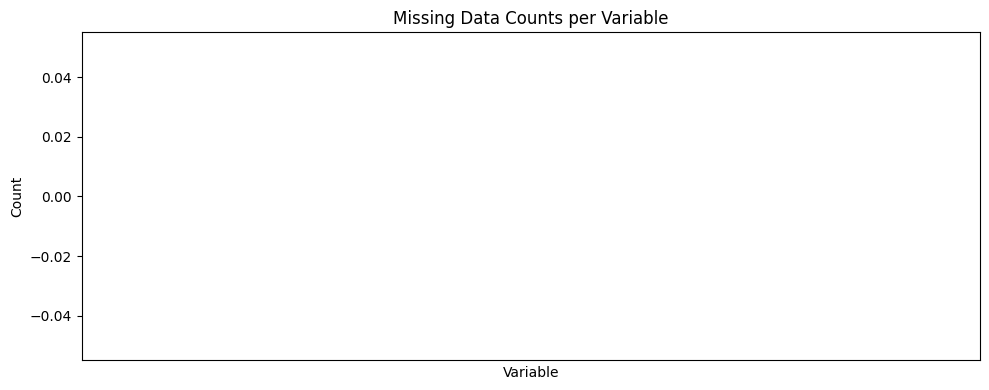

In [59]:
eda_helper_functions.plot_missing_info(train)

## 5. High Level of Outliers

In [70]:
forest=IsolationForest(n_estimators=6400,random_state=42)

In [78]:
 
(train.assign(outliers=IsolationForest(contamination=0.01).fit_predict(train.drop(columns="price").select_dtypes(include="number")))
     .query("outliers == -1")
     .duration
     .describe)

C:\Users\Debasish Das\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


<bound method NDFrame.describe of 113     1950
139     2245
168     2230
201     2240
292     2480
        ... 
6157    2170
6160    1480
6235    2295
6301    2860
6373    2240
Name: duration, Length: 64, dtype: int64>

## 6. Pair plots

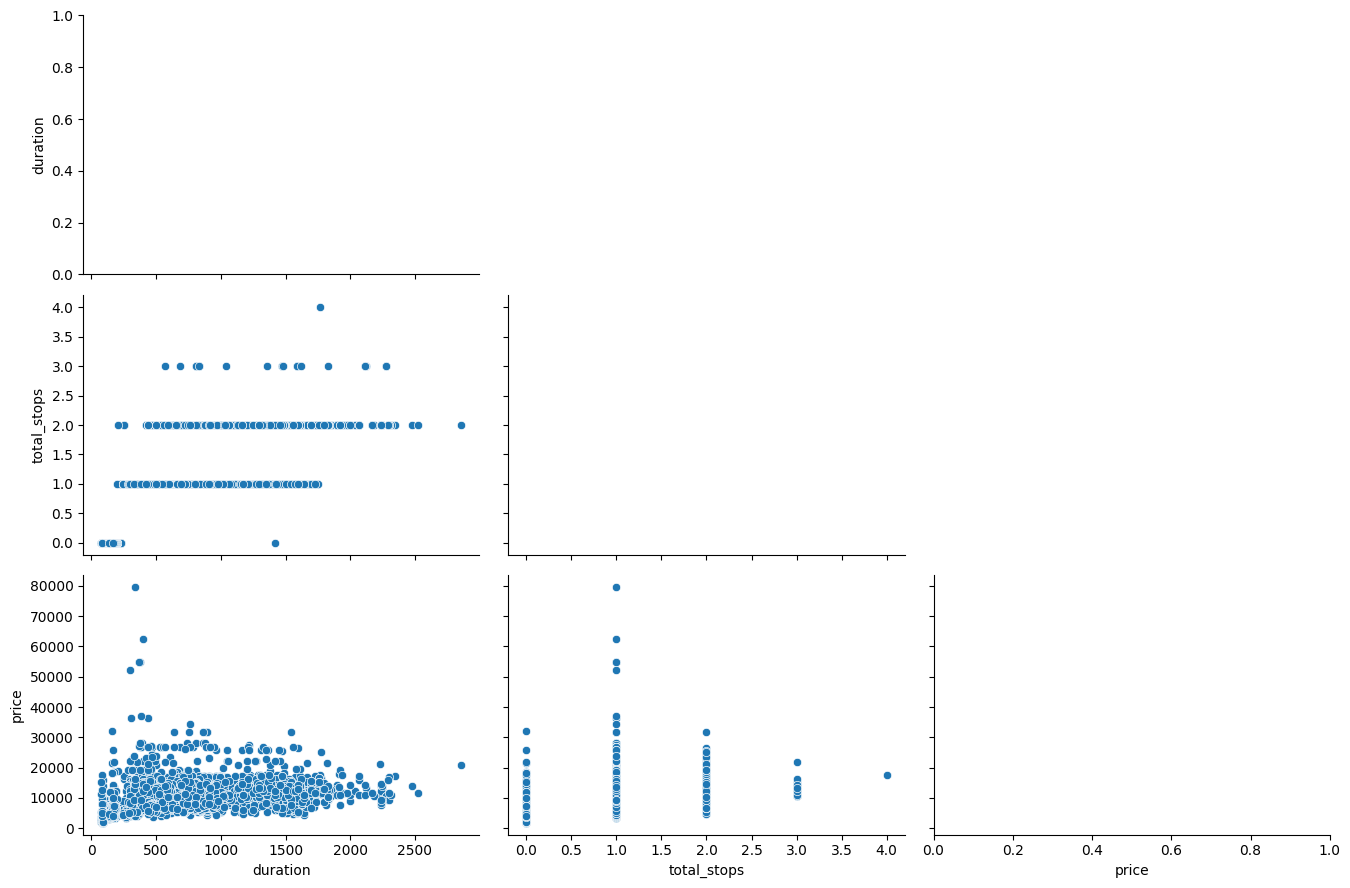

In [79]:
eda_helper_functions.pair_plots(train)

## 7. Correlation

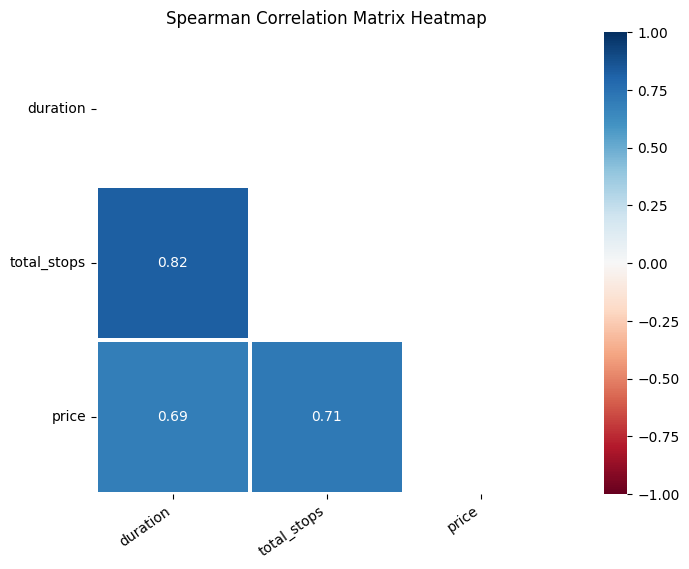

In [80]:
eda_helper_functions.correlation_heatmap(train)

In [81]:
train.corr(method="spearman",numeric_only=True)

,duration,total_stops,price
duration,1.000000,0.822844,0.691926
total_stops,0.822844,1.000000,0.711429
price,0.691926,0.711429,1.000000


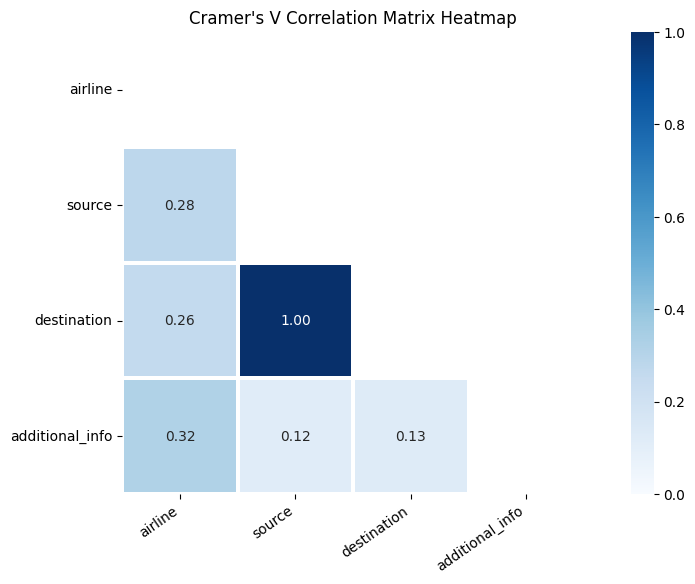

In [82]:
eda_helper_functions.cramersV_heatmap(train)

## 8. Detailed analysis of each feature 